---
<h1 align="center"><strong> Work With GloVe for Word Embeddings</strong></h1>

---

**`GloVe`** is an unsupervised learning algorithm for obtaining vector representation for words. In this recipe, we will see how to generate vectors for a given word & an entire sentence.

### **Vectorize words**

Download `GloVe` pre-trained vectors form stanford web site.

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip --quiet
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
!ls -lrt

total 3039136
-rw-rw-r-- 1 root root  347116733 Aug  4  2014 glove.6B.100d.txt
-rw-rw-r-- 1 root root  693432828 Aug  4  2014 glove.6B.200d.txt
-rw-rw-r-- 1 root root  171350079 Aug  4  2014 glove.6B.50d.txt
-rw-rw-r-- 1 root root 1037962819 Aug 27  2014 glove.6B.300d.txt
-rw-r--r-- 1 root root  862182613 Oct 25  2015 glove.6B.zip
drwxr-xr-x 1 root root       4096 Sep 16 13:40 sample_data


Required libraries

In [ ]:
import os
import numpy as np

Create a dictionary having word as key and vector as value for all of the entries in file `glove.6B.50.txt`

In [ ]:
# Create Empty dictionary
word2vector = {}

# Create a dictionary with word and corresponding vectors
with open (os.path.join("glove.6B.50d.txt")) as file:
  for line in file:
    list_of_values = line.split()
    word = list_of_values[0]
    vector_of_word = np.array(list_of_values[1:], dtype="float32")
    word2vector[word] = vector_of_word

msg = f"Total number of words and corresponding vectors in  word2vectors are {len(word2vector)}"
print(msg)

# View first record in word2vector dictionary
for word, vector in word2vector.items():
  print(word)
  print(vector)
  print(vector.shape)
  break

Total number of words and corresponding vectors in  word2vectors are 400000
the
[ 4.1800e-01  2.4968e-01 -4.1242e-01  1.2170e-01  3.4527e-01 -4.4457e-02
 -4.9688e-01 -1.7862e-01 -6.6023e-04 -6.5660e-01  2.7843e-01 -1.4767e-01
 -5.5677e-01  1.4658e-01 -9.5095e-03  1.1658e-02  1.0204e-01 -1.2792e-01
 -8.4430e-01 -1.2181e-01 -1.6801e-02 -3.3279e-01 -1.5520e-01 -2.3131e-01
 -1.9181e-01 -1.8823e+00 -7.6746e-01  9.9051e-02 -4.2125e-01 -1.9526e-01
  4.0071e+00 -1.8594e-01 -5.2287e-01 -3.1681e-01  5.9213e-04  7.4449e-03
  1.7778e-01 -1.5897e-01  1.2041e-02 -5.4223e-02 -2.9871e-01 -1.5749e-01
 -3.4758e-01 -4.5637e-02 -4.4251e-01  1.8785e-01  2.7849e-03 -1.8411e-01
 -1.1514e-01 -7.8581e-01]
(50,)


Generate vectors for each word in a given sentence

In [ ]:
# Sample sentence with four words
sample_sentence = "convert word into vectors"

for i in sample_sentence.split():
  print(i, word2vector[i], word2vector[i].shape)

convert [ 0.33661   -0.51168    0.87064   -0.95326    0.74852    0.12839
 -0.37988    0.10754   -0.36786    1.4141     0.62383    0.45762
  0.62611   -0.11105   -0.41305    0.67618    0.43104   -0.57291
  0.016154  -0.0049896  0.40332   -0.59646   -0.43036    0.20764
 -0.1147    -0.99394    0.68397   -1.089      0.51071   -0.37707
  2.0347    -0.13211   -0.35318    0.01808    0.40005   -0.13595
 -0.058802   0.073057   0.12816    0.0078398  0.70848   -0.36644
  0.25745    0.75544   -0.037074   0.50653   -0.055351  -0.20353
 -0.37791   -0.67328  ] (50,)
word [-0.1643     0.15722   -0.55021   -0.3303     0.66463   -0.1152
 -0.2261    -0.23674   -0.86119    0.24319    0.074499   0.61081
  0.73683   -0.35224    0.61346    0.0050975 -0.62538   -0.0050458
  0.18392   -0.12214   -0.65973   -0.30673    0.35038    0.75805
  1.0183    -1.7424    -1.4277     0.38032    0.37713   -0.74941
  2.9401    -0.8097    -0.66901    0.23123   -0.073194  -0.13624
  0.24424   -1.0129    -0.24919   -0.06893    

### Finding Similar Vectors
Another thing we can do with GloVe vectors is find the most similar words to a given word. We can do this with a fancy one-liner function as follows:

In [ ]:
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
def find_closest_embeddings(embedding, word2vector):
  return sorted(word2vector.keys(), key=lambda word: spatial.distance.euclidean(word2vector[word], embedding))

In [ ]:
print(find_closest_embeddings(word2vector["king"], word2vector)[:5])

['king', 'prince', 'queen', 'uncle', 'ii']


Since the closest word to a given word will always be that word, we can offset our slice by one.

In [ ]:
print(find_closest_embeddings(word2vector["king"], word2vector)[1:6])

['prince', 'queen', 'uncle', 'ii', 'grandson']


### Math with Words

In [ ]:
print(find_closest_embeddings(
    word2vector["twig"] - word2vector["branch"] + word2vector["hand"], word2vector
)[:5])

['fingernails', 'toenails', 'stringy', 'peeling', 'shove']


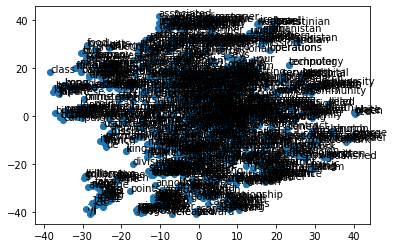

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(word2vector.keys())
vectors = [word2vector[word] for word in words]

Y = tsne.fit_transform(vectors[:1000])
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")

plt.show()

### **Vectorize Sentences**

In [ ]:
def get_vector(word, word2vector_dict):
  return word2vector_dict[word]

def get_word_vectors(sentence, word2vector_dict):
  word_vectors = []
  for word in sentence:
    try:
      word_vector = get_vector(word.lower(), word2vector_dict)
      word_vectors.append(word_vector)
    except KeyError:
      continue
  return word_vectors


def get_sentence_vector(word_vectors):
  matrix = np.array(word_vectors)
  centroid = np.mean(matrix[:,:], axis=0)
  return centroid

In [ ]:
print(get_sentence_vector(get_word_vectors('Learning NLP is like having fun', word2vector)))

[-9.1669627e-02  8.3404088e-01  7.1371925e-01  5.4852343e-01
  5.1569533e-01  4.8397597e-02  5.9465349e-01 -6.6483378e-01
 -5.0780666e-01 -9.4543390e-02 -1.1863792e-01  3.3956325e-01
 -6.2242115e-01 -4.8783556e-01  2.6107896e-02  1.3818262e-02
 -9.9773772e-02  1.1941577e-01 -3.9762485e-01 -4.1227648e-01
 -3.7622961e-01 -3.9206204e-01  8.2525927e-01  5.4125857e-01
 -1.1472449e-01 -6.0736358e-01 -3.9045289e-01 -1.3585274e-05
  2.6557943e-01 -1.6677009e-01  2.5147617e+00  7.7091213e-03
 -2.9480711e-01  5.0526500e-01  2.3373300e-01 -7.3001283e-01
  6.0985309e-01 -3.9620000e-01  2.9823154e-01  1.8768860e-01
  7.4073434e-01 -4.4448350e-02 -3.1802109e-01 -3.7778191e-02
 -2.1125579e-01  4.1691014e-01  2.3917863e-01 -3.6104503e-01
  3.1240878e-01  9.5953929e-01]


### Refernces
* [GloVe: Global Vectors for Word Representation
](https://nlp.stanford.edu/pubs/glove.pdf)
* [Visualizing Data using t-SNE](https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)